# TensorFlow Basics

## TF Basic Syntax

In [520]:
import tensorflow as tf

In [521]:
print(tf.__version__)

1.3.0


In [522]:
hello = tf.constant("Hello")

In [523]:
world = tf.constant("World")

In [524]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [525]:
print(hello)

Tensor("Const_47:0", shape=(), dtype=string)


In [526]:
# To print the "hello"
# Use "with" to aviod close the session 
with tf.Session() as sess: 
    
    result = sess.run(hello + world)

In [527]:
print (result)

b'HelloWorld'


In [528]:
a = tf.constant(10)
b = tf.constant(20)

In [529]:
type(a)

tensorflow.python.framework.ops.Tensor

In [530]:
a + b 

# <tf.Tensor 'add_2:0' shape=() dtype=int32> 

<tf.Tensor 'add_136:0' shape=() dtype=int32>

In [531]:
a + b 

# <tf.Tensor 'add_3:0' shape=() dtype=int32> 

<tf.Tensor 'add_137:0' shape=() dtype=int32>

In [532]:
a + b 

# <tf.Tensor 'add_4:0' shape=() dtype=int32> 
## tensor track how many times you ran

<tf.Tensor 'add_138:0' shape=() dtype=int32>

In [533]:
with tf.Session() as sess:
    
    result = sess.run(a+b)

In [534]:
result

30

In [535]:
const = tf.constant(10)

In [536]:
fill_mat = tf.fill((4,4), 10)

In [537]:
myzeros = tf.zeros((4,4))

In [538]:
myones = tf.ones((4,4))

In [539]:
myrandn = tf.random_normal((4,4),mean=0,stddev=1.0)

In [540]:
myrandu = tf.random_uniform((4,4),minval=0,maxval=1)

In [541]:
my_ops = [const, fill_mat, myzeros,myones, myrandn, myrandu]

In [542]:
sess = tf.InteractiveSession() 

In [543]:
# this can be run 
# because sess = tf.InteractiveSession() for jupyter notebook environment 
# Otherwise, it should be run through with tf.Session() as sess:

for op in my_ops: 
    
    print(sess.run(op)) # have same result as 'op.eval()'
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


[[ 1.11792481 -0.12602974 -0.41129205 -0.42375028]
 [ 1.80429494  2.51863837  1.42562413 -0.91960567]
 [ 0.30187181  1.32487452  0.36977082 -0.30093992]
 [ 0.94635051 -0.17704675  1.33241928 -0.07831638]]


[[ 0.48268569  0.6604892   0.95762122  0.0093689 ]
 [ 0.28063059  0.31939459  0.76884758  0.14571357]
 [ 0.55881846  0.14101636  0.42148185  0.90452933]
 [ 0.92934394  0.77126801  0.37837923  0.2996285 ]]




In [544]:
a = tf.constant([[1,2],
                 [3,4]])

In [545]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [546]:
b = tf.constant([ [10],[100] ])

In [547]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [548]:
result = tf.matmul(a,b)

In [549]:
result.eval()

array([[210],
       [430]], dtype=int32)

In [550]:
sess.run(result)

array([[210],
       [430]], dtype=int32)

## TF Graphs

In [551]:
n1 = tf.constant(1)

In [552]:
n2 = tf.constant(2)

In [553]:
n3 = n1 + n2

In [554]:
with tf.Session() as sess:
    
    result = sess.run(n3)

In [555]:
print(result)

3


In [556]:
print(n3)

Tensor("add_140:0", shape=(), dtype=int32)


In [557]:
print(tf.get_default_graph())

In [558]:
g = tf.Graph()

In [559]:
print(g)

In [560]:
graph_one = tf.get_default_graph()

In [561]:
print(graph_one)

In [562]:
graph_two = tf.Graph()

In [563]:
print(graph_two)

In [564]:
with graph_two.as_default():
    
    print (graph_two is tf.get_default_graph())

True


In [565]:
print (graph_two is tf.get_default_graph())

False


## TF Variables

In [566]:
sess = tf.InteractiveSession() 

In [567]:
my_tensor = tf.random_uniform((4,4),0,1)

In [568]:
my_tensor

<tf.Tensor 'random_uniform_11:0' shape=(4, 4) dtype=float32>

In [569]:
my_var = tf.Variable(initial_value=my_tensor)

In [570]:
print(my_var)

<tf.Variable 'Variable_23:0' shape=(4, 4) dtype=float32_ref>


In [571]:
init = tf.global_variables_initializer()

In [572]:
sess.run(init)

In [573]:
sess.run(my_var)

array([[ 0.60055864,  0.53132474,  0.59162569,  0.80508792],
       [ 0.94262564,  0.38468564,  0.63696015,  0.2118845 ],
       [ 0.75567353,  0.26108325,  0.23145127,  0.18456721],
       [ 0.31447411,  0.99978888,  0.63943005,  0.2765789 ]], dtype=float32)

## TF Placeholders

In [574]:
ph = tf.placeholder(tf.float32,shape=(4,4))

In [575]:
ph = tf.placeholder(tf.float32,shape=(None,5)) 
# 'None' is becuase it is unknown number of rows(record)

# Neural Network

In [576]:
import numpy as np
np.random.seed(101)
tf.set_random_seed(101)

In [577]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a 

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [578]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b 

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [579]:
a = tf.placeholder(tf.float32)

In [580]:
b = tf.placeholder(tf.float32)

In [581]:
add_op = a + b

In [582]:
mul_op = a * b

In [583]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op, feed_dict={a:10,b:20})
    
    print (add_result)

30.0


In [584]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op, feed_dict={a:rand_a,b:rand_b})
    
    print (add_result)
    
    print('\n')
    
    mult_result = sess.run(mul_op, feed_dict={a:rand_a,b:rand_b})
    
    print (mult_result)
    

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


## Example Neural Network

In [585]:
n_features = 10 
n_dense_neurons = 3

In [586]:
x = tf.placeholder(tf.float32,(None,n_features))

In [587]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [588]:
xW = tf.matmul(x,W)

In [589]:
z = tf.add(xW,b)

In [590]:
a = tf.sigmoid(z)

In [591]:
init = tf.global_variables_initializer()

In [592]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [593]:
print (layer_out)

[[ 0.99633199  0.88839889  0.2417843 ]]


## Simple Regression Example

In [594]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [595]:
y_label = np.linspace(0,10,10) +np.random.uniform(-1.5,1.5,10)
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

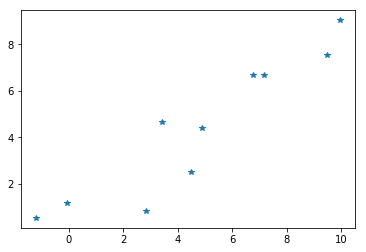

In [596]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data, y_label, "*")

In [597]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [598]:
m = tf.Variable(0.49)
b = tf.Variable(0.97)

In [599]:
error = 0 

for x,y in zip(x_data,y_label):
    
    y_hat = m * x + b 
    
    error  += (y - y_hat)**2

In [600]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [601]:
train = optimizer.minimize(error)

In [602]:
init = tf.global_variables_initializer()

In [603]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    

    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

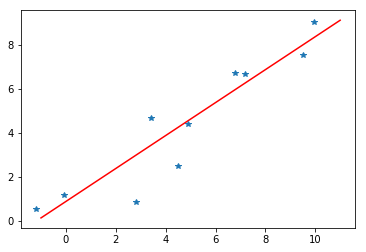

In [604]:
x_test = np.linspace(-1,11,10)

# y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data,y_label, '*')

# Regression 

In [605]:
import pandas as pd

In [606]:
x_data = np.linspace(0.0,10.0,1000000)

In [607]:
noise = np.random.randn(len(x_data))

In [608]:
noise

array([-0.03157914,  0.64982583,  2.15484644, ..., -0.39165848,
        0.26840566, -1.24638586])

In [609]:
y_true = (0.5 *x_data) +5 + noise

In [610]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

y_df = pd.DataFrame(data=y_true, columns=['Y'])

my_data = pd.concat([x_df,y_df], axis=1)

In [611]:
my_data.head()

,X Data,Y
0,0.00000,4.968421
1,0.00001,5.649831
2,0.00002,7.154856
3,0.00003,4.389756
4,0.00004,4.244695


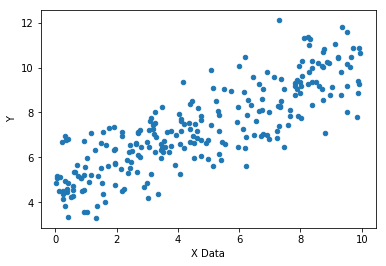

In [612]:
my_data.sample(n=250).plot(kind='scatter',x='X Data', y='Y')

In [613]:
batch_size = 8

In [614]:
np.random.randn(2)

array([-0.0333475 ,  1.67028503])

In [615]:
m = tf.Variable(-0.28)
b = tf.Variable(-1.30)

In [616]:
xph = tf.placeholder(tf.float32, [batch_size])

yph = tf.placeholder(tf.float32, [batch_size])

In [617]:
y_model = m*xph + b

In [618]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [619]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [620]:
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

In [621]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [622]:
model_m

0.54233748

In [623]:
model_b

4.8887401

In [624]:
y_hat = x_data*model_m + model_b

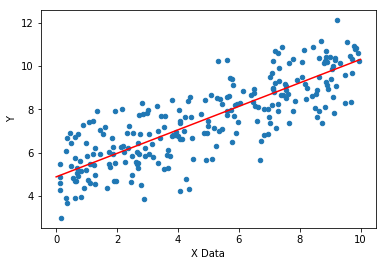

In [625]:
my_data.sample(250).plot(kind='scatter', x="X Data", y="Y")
plt.plot(x_data,y_hat, "r")

## Estimator API

In [626]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])] 
#shape is the dimension

In [627]:
feat_cols

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [628]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmphi0jq6px', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100}


In [629]:
from sklearn.model_selection import train_test_split

In [630]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,
                                                    random_state=101)

In [631]:
print(x_train.shape)

(700000,)


In [632]:
x_eval.shape

(300000,)

In [633]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                                batch_size=8,num_epochs=None,
                                                shuffle=True)

In [634]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                                batch_size=8,num_epochs=1000,
                                                shuffle=False)

In [635]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,
                                                batch_size=8,num_epochs=1000,
                                                shuffle=False)

In [636]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmphi0jq6px/model.ckpt.
INFO:tensorflow:loss = 383.024, step = 1
INFO:tensorflow:global_step/sec: 539.925
INFO:tensorflow:loss = 25.2754, step = 101 (0.186 sec)
INFO:tensorflow:global_step/sec: 550.998
INFO:tensorflow:loss = 11.3385, step = 201 (0.182 sec)
INFO:tensorflow:global_step/sec: 500.077
INFO:tensorflow:loss = 11.3193, step = 301 (0.199 sec)
INFO:tensorflow:global_step/sec: 480.151
INFO:tensorflow:loss = 30.4946, step = 401 (0.209 sec)
INFO:tensorflow:global_step/sec: 500.446
INFO:tensorflow:loss = 11.5055, step = 501 (0.203 sec)
INFO:tensorflow:global_step/sec: 670.799
INFO:tensorflow:loss = 18.2087, step = 601 (0.147 sec)
INFO:tensorflow:global_step/sec: 629.516
INFO:tensorflow:loss = 10.9864, step = 701 (0.158 sec)
INFO:tensorflow:global_step/sec: 656.504
INFO:tensorflow:loss = 11.8492, step = 801 (0.152 sec)
INFO:tensorflow:global_step/

In [637]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2019-06-20-16:44:56
INFO:tensorflow:Restoring parameters from /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmphi0jq6px/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

In [638]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2019-06-20-16:45:01
INFO:tensorflow:Restoring parameters from /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmphi0jq6px/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

In [639]:
print("TRAINING DATA METRICS")
print(train_metrics)

TRAINING DATA METRICS
{'global_step': 1000, 'average_loss': 1.0817941, 'loss': 8.6543531}


In [640]:
print("EVAL DATA METRICS")
print(eval_metrics)

EVAL DATA METRICS
{'global_step': 1000, 'average_loss': 1.0523065, 'loss': 8.4184523}


In [641]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},
                                                     shuffle=False)

In [642]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmphi0jq6px/model.ckpt-1000


[{'predictions': array([ 4.41204643], dtype=float32)},
 {'predictions': array([ 5.06675959], dtype=float32)},
 {'predictions': array([ 5.72147274], dtype=float32)},
 {'predictions': array([ 6.37618542], dtype=float32)},
 {'predictions': array([ 7.03089857], dtype=float32)},
 {'predictions': array([ 7.68561125], dtype=float32)},
 {'predictions': array([ 8.3403244], dtype=float32)},
 {'predictions': array([ 8.99503708], dtype=float32)},
 {'predictions': array([ 9.64975071], dtype=float32)},
 {'predictions': array([ 10.30446339], dtype=float32)}]

In [643]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmphi0jq6px/model.ckpt-1000


In [644]:
predictions

[array([ 4.41204643], dtype=float32),
 array([ 5.06675959], dtype=float32),
 array([ 5.72147274], dtype=float32),
 array([ 6.37618542], dtype=float32),
 array([ 7.03089857], dtype=float32),
 array([ 7.68561125], dtype=float32),
 array([ 8.3403244], dtype=float32),
 array([ 8.99503708], dtype=float32),
 array([ 9.64975071], dtype=float32),
 array([ 10.30446339], dtype=float32)]

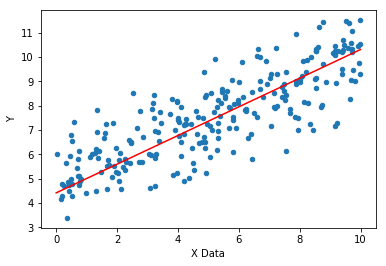

In [645]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r')

# Classification

In [646]:
diabetes = pd.read_csv('02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [647]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [648]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [649]:
# normalize data

cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']


In [650]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 

In [651]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [652]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [653]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigress = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [654]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])


In [655]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

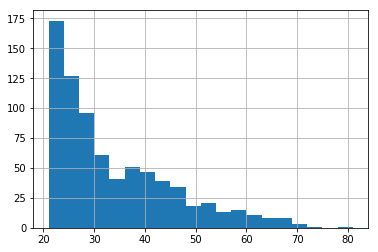

In [656]:
diabetes['Age'].hist(bins=20)

In [657]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [658]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,
             diabetes_pedigress,age_bucket]

In [659]:
# TRAIN TEST SPLIT

x_data = diabetes.drop('Class',axis=1)

In [660]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [661]:
labels = diabetes['Class']

In [662]:
# labels

In [663]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [664]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, 
                                                 batch_size=10, num_epochs=1000,
                                                shuffle=True)


In [665]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmpkt8zwhil', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100}


In [666]:
model.train(input_fn=input_func, steps =1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmpkt8zwhil/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 262.471
INFO:tensorflow:loss = 4.67199, step = 101 (0.382 sec)
INFO:tensorflow:global_step/sec: 279.493
INFO:tensorflow:loss = 5.00093, step = 201 (0.363 sec)
INFO:tensorflow:global_step/sec: 251.259
INFO:tensorflow:loss = 5.52063, step = 301 (0.396 sec)
INFO:tensorflow:global_step/sec: 224.263
INFO:tensorflow:loss = 4.85328, step = 401 (0.446 sec)
INFO:tensorflow:global_step/sec: 242.985
INFO:tensorflow:loss = 3.25719, step = 501 (0.415 sec)
INFO:tensorflow:global_step/sec: 256.699
INFO:tensorflow:loss = 5.63308, step = 601 (0.385 sec)
INFO:tensorflow:global_step/sec: 235.886
INFO:tensorflow:loss = 4.78308, step = 701 (0.425 sec)
INFO:tensorflow:global_step/sec: 305.913
INFO:tensorflow:loss = 5.38971, step = 801 (0.330 sec)
INFO:tensorflow:global_step/

In [667]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test, 
                                                      batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [668]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-06-20-16:45:23
INFO:tensorflow:Restoring parameters from /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmpkt8zwhil/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-06-20-16:45:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.718615, accuracy_baseline = 0.649351, auc = 0.799753, auc_precision_recall = 0.648247, average_loss = 0.526921, global_step = 1000, label/mean = 0.350649, loss = 5.07162, prediction/mean = 0.341573


In [669]:
results

{'accuracy': 0.7186147,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79975307,
 'auc_precision_recall': 0.64824659,
 'average_loss': 0.52692145,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.071619,
 'prediction/mean': 0.34157306}

In [670]:
# Prediction does not have y 
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [671]:
predictions = model.predict(pred_input_func)

In [672]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Restoring parameters from /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmpkt8zwhil/model.ckpt-1000


[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.47524917], dtype=float32),
  'logits': array([-0.09908414], dtype=float32),
  'probabilities': array([ 0.52475077,  0.47524917], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.58930862], dtype=float32),
  'logits': array([ 0.36110795], dtype=float32),
  'probabilities': array([ 0.41069141,  0.58930862], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.35368395], dtype=float32),
  'logits': array([-0.60288483], dtype=float32),
  'probabilities': array([ 0.64631599,  0.35368398], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.29528078], dtype=float32),
  'logits': array([-0.86987281], dtype=float32),
  'probabilities': array([ 0.70471919,  0.29528075], dtype=float32)},
 {'class_ids': array([0]),
  'classes': arra

In [673]:

#  hidden units: Iterable of number hidden units per layer. All layers are 
#  fully connected. Ex. `[64, 32]` means first layer has 64 nodes and 
#  second one has 32.
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10,10,10],
                                       feature_columns=feat_cols, 
                                       n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmp_t2s47as', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100}


In [674]:
dnn_model.train(input_fn = input_func, steps =1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmp_t2s47as/model.ckpt.
INFO:tensorflow:loss = 7.02631, step = 1
INFO:tensorflow:global_step/sec: 241.926
INFO:tensorflow:loss = 5.84209, step = 101 (0.422 sec)
INFO:tensorflow:global_step/sec: 283.831
INFO:tensorflow:loss = 4.88944, step = 201 (0.349 sec)
INFO:tensorflow:global_step/sec: 261.111
INFO:tensorflow:loss = 3.51729, step = 301 (0.387 sec)
INFO:tensorflow:global_step/sec: 263.739
INFO:tensorflow:loss = 3.02605, step = 401 (0.374 sec)
INFO:tensorflow:global_step/sec: 225.151
INFO:tensorflow:loss = 4.9818, step = 501 (0.445 sec)
INFO:tensorflow:global_step/sec: 251.712
INFO:tensorflow:loss = 5.53747, step = 601 (0.396 sec)
INFO:tensorflow:global_step/sec: 274.485
INFO:tensorflow:loss = 3.96606, step = 701 (0.367 sec)
INFO:tensorflow:global_step/sec: 235.819
INFO:tensorflow:loss = 3.87457, step = 801 (0.424 sec)
INFO:tensorflow:global_step/s

In [676]:
embedded_group_col = tf.column.embedding_column(assigned_group,
                                                dimension=4)

In [677]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,
             diabetes_pedigress,embedded_group_col, age_bucket]

In [678]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,
                                                 num_epochs=1000, shuffle=True)

In [684]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20, 20, 10,10],
                                       feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmpkt10dgiu', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_session_config': None, '_save_summary_steps': 100, '_tf_random_seed': 1, '_log_step_count_steps': 100}


In [685]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmpkt10dgiu/model.ckpt.
INFO:tensorflow:loss = 7.38697, step = 1
INFO:tensorflow:global_step/sec: 244.204
INFO:tensorflow:loss = 4.02467, step = 101 (0.414 sec)
INFO:tensorflow:global_step/sec: 251.819
INFO:tensorflow:loss = 7.89994, step = 201 (0.401 sec)
INFO:tensorflow:global_step/sec: 280.874
INFO:tensorflow:loss = 5.62955, step = 301 (0.352 sec)
INFO:tensorflow:global_step/sec: 262.374
INFO:tensorflow:loss = 3.33474, step = 401 (0.384 sec)
INFO:tensorflow:global_step/sec: 287.493
INFO:tensorflow:loss = 5.15105, step = 501 (0.344 sec)
INFO:tensorflow:global_step/sec: 273.807
INFO:tensorflow:loss = 5.12869, step = 601 (0.367 sec)
INFO:tensorflow:global_step/sec: 288.793
INFO:tensorflow:loss = 3.81231, step = 701 (0.349 sec)
INFO:tensorflow:global_step/sec: 274.257
INFO:tensorflow:loss = 5.20013, step = 801 (0.366 sec)
INFO:tensorflow:global_step/

In [686]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                      batch_size=10,num_epochs=1,shuffle=False)

In [687]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-06-20-18:15:02
INFO:tensorflow:Restoring parameters from /var/folders/s1/h9x0_mhx4tn1dfstx3w6gvhc0000gn/T/tmpkt10dgiu/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-06-20-18:15:04
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.822058, auc_precision_recall = 0.713476, average_loss = 0.495765, global_step = 1000, label/mean = 0.350649, loss = 4.77174, prediction/mean = 0.383373


{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8220576,
 'auc_precision_recall': 0.71347594,
 'average_loss': 0.49576545,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7717423,
 'prediction/mean': 0.38337272}